<h2><b>Análise Exploratória da Base de Processos Jurídicos do Brasil</b></h2><br>
    A jurimetria é um campo do conhecimento que surgiu ao longo da trajetória jurídica e do exercício da advocacia no país. É multidisciplinar, pois engloba conhecimentos da área de exatas e das ciências jurídicas.
    Basicamente na jurimetria aplicam-se cálculos estatísticos em conjuntos de dados obtidos através do exercício jurídico, em um determinado contexto, para obter informações precisas e/ou padronizadas que serão utilizadas pelos gestores do direito para a tomada de decisões.

<b>Objetivo</b><br>
Os dados de processos do Brasil estão espalhados em diversas fontes pela internet, a base utilizada é um exemplo das informações geradas pelo campo do direito. O objetivo desse projeto é analisar os dados obtidos demonstrando algumas técnicas de análise exploratória utilizando a linguagem python.

<b>Fonte</b><br>
Os dados utilizados neste projeto são datados até o ano de 2018 e foram obtidos no perfil do professor Roberto Vasconcelos Novaes no site Github. Link: https://github.com/rvnovaes/jurimetria

In [29]:
#O primeiro passo é a importação dos pacotes necessários para utilização das funções de manipulação de dados
#Utilizarei aqui as bibliotecas pandas, matplotlib, pandas profiling e seborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [30]:
"""Inicializando o formato de visualização do matplotlib para inline, desta forma os gráficos são 
   apresentados em linha sem as opções de manipulação pois quero apenas a demonstração dos dados.
   Além disso, foram usadas as opções de display do pandas para que ao apresentar os dados não 
   sejam suprimidas colunas ou linhas, assim temos uma visualização completa dos dados."""

%matplotlib inline
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [31]:
#Importação da base de dados
df = pd.read_csv('https://raw.githubusercontent.com/rvnovaes/jurimetria/master/datasets/processos/dados_processos.csv',sep=',',header=0)

<h3><b>Conhecendo os dados</b><br></h3>
Na análise de dados a etapa inicial baseia-se em conhecer como os dados estão estruturados e em qual contexto se aplicam. Através desse conhecimento podem ser geradas hipóteses de investigação que serão testadas ao longo do processo.

<b>Dicionário das variáveis</b>
<ul>
    <li>numero: É o número atribuido ao processo durante a tramitação.</li>
    <li>orgao: É o orgão responsável pela tramitação do processo.</li>
    <li>tipo: É o tipo de numeração do processo(ex: Pje = Processo Judicial Eletrônico).</li>
    <li>comarca_forum: É a comarca responsável pelo processo.</li>
    <li>vara: vara responsável pelo processo.</li>
    <li>assunto: É o assunto abordado.</li>
    <li>natureza: É a natureza do processo.</li>
    <li>tipo_acao: É o tipo da ação impetrada.</li>
    <li>status: É o estado atual do processo(ex: arquivado).</li>
    <li>encerramento: É a data de encerramento do processo.</li>
    <li>audiencia: É a data da audiência marcada.</li>
    <li>audiencia_/hora: É o horário da audiência marcada.</li>
    <li>distribuição: É a data de distribução do processo.</li>
    <li>valor: É valor mensurado no processo, quando existe.</li>
    <li>numero_antigo: Como o número do processo pode ser mudado durante a tramitação precisa-se de uma referência ao número anterior.</li>
    <li>numero_unico: É a numeração única do processo durante a tramitação.</li>
    <li>autor: É a pessoa que "acusa" no processo.</li>
    <li>autor_adv: É o conjunto de advogados do acusante.</li>
    <li>reu: É a pessoa "acusada" no processo.</li>
    <li>reu_adv: É o conjunto de advogados do acusado.</li>
    <li>digital_fisico: É a indicação se o processo está em formato digitalizado ou físico.</li>
    <li>instancia: É a instância na qual o processo está tramitando</li>
    <li>duração: É o número de dias de duração do processo.</li>
</ul>

In [32]:
#Visualizando os dados da base
df.head(6)

,numero,orgao,tipo,comarca_forum,vara,assunto,natureza,tipo_acao,status,encerramento,audiencia,audiencia_/hora,distribuicao,valor,numero_antigo,numero_unico,autor,autor_adv,reu,reu_adv,digital_fisico,instancia,duracao
0,0010578-58.2017.5.03.0150,TRT 03 - Tribunal Regional do Trabalho da 3a R...,PJE,Santa Rita do Sapucaí,Vara do Trabalho de Santa Rita do Sapucaí,Anotação na CTPS / Reconhecimento de Relação d...,RTOrd,NaN,arquivado,24/07/2017,24/07/2017,13:45,06/07/2017,NaN,0010578-58.2017.5.03.0150,0010578-58.2017.5.03.0150,RAIANE VIEIRA SANTOS MOREIRA,"JOSE BORGES PEREIRA COSTA,COSMES MARCELO DE SOUZA","JULIANA DA FONSECA ALVES - ME,JULIANA DA FONSE...",JOSÉ FREDERICO CIMINO MANSSUR,digital,1,18
1,0010580-28.2017.5.03.0150,TRT 03 - Tribunal Regional do Trabalho da 3a R...,PJE,Santa Rita do Sapucaí,Vara do Trabalho de Santa Rita do Sapucaí,Anotação na CTPS / Reconhecimento de Relação d...,RTOrd,NaN,arquivado,24/07/2017,25/07/2017,13:10,06/07/2017,NaN,0010580-28.2017.5.03.0150,0010580-28.2017.5.03.0150,TAINA MARINHO DE SOUZA,"COSMES MARCELO DE SOUZA,JOSE BORGES PEREIRA COSTA","JULIANA DA FONSECA ALVES - ME,JULIANA DA FONSE...",JOSÉ FREDERICO CIMINO MANSSUR,digital,1,18
2,0133181-85.2017.8.19.0038,TJRJ - Tribunal de Justiça do Estado do Rio de...,Numeração única,Nova Iguaçu,1º Juizado Especial Cível,Dano Moral Outros - Cdc,NaN,Procedimento do Juizado Especial Cível/Fazendário,Procedente,26/03/2018,24/11/2017,14:50,07/03/2018,NaN,0133181-85.2017.8.19.0038,0133181-85.2017.8.19.0038,PETERSON DE JESUS OLIVEIRA NEDY,DANIELLE RODRIGUES DIOGO COSTA - RJ145044,99 TAXIS DESENVOLVIMENTO DE SOFTWARES LTDA,EDUARDO GAZALE FÉO - SP168826,digital,1,19
3,0133181-85.2017.8.19.0038,TJRJ - Tribunal de Justiça do Estado do Rio de...,Numeração única,Nova Iguaçu,1º Juizado Especial Cível,Dano Moral Outros - Cdc,0,Procedimento do Juizado Especial Cível/Fazendário,Procedente,26/03/2018,24/11/2017,14:50,07/03/2018,0,0133181-85.2017.8.19.0038,0133181-85.2017.8.19.0038,PETERSON DE JESUS OLIVEIRA NEDY,DANIELLE RODRIGUES DIOGO COSTA - RJ145044,99 TAXIS DESENVOLVIMENTO DE SOFTWARES LTDA,EDUARDO GAZALE FÉO - SP168826,digital,1,19
4,0000500-67.2016.8.26.0079,TJSP - Tribunal de Justiça do Estado de São Paulo,Consulta do 1º Grau / e-Saj - Número único,Foro de Botucatu,CEJUSC (Pré,Obrigações,Cível,Reclamação Pré-processual,arquivado,12/02/2016,11/02/2016,09:20,19/01/2016,NaN,0000500-67.2016.8.26.0079,0000500-67.2016.8.26.0079,Mailson E. Del Omo de Camargo,NaN,Urbaplan,NaN,digital,1,24
5,0000500-67.2016.8.26.0079,TJSP - Tribunal de Justiça do Estado de São Paulo,Consulta do 1º Grau / e-Saj - Número único,Foro de Botucatu,CEJUSC (Pré,Obrigações,Cível,Reclamação Pré-processual,arquivado,12/02/2016,11/02/2016,09:20,19/01/2016,0,0000500-67.2016.8.26.0079,0000500-67.2016.8.26.0079,Mailson E. Del Omo de Camargo,NaN,Urbaplan,NaN,digital,1,24


In [33]:
#obtendo informações estatísticas da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 23 columns):
numero             1338 non-null object
orgao              1355 non-null object
tipo               1354 non-null object
comarca_forum      1355 non-null object
vara               1355 non-null object
assunto            1269 non-null object
natureza           1105 non-null object
tipo_acao          972 non-null object
status             1355 non-null object
encerramento       1355 non-null object
audiencia          746 non-null object
audiencia_/hora    746 non-null object
distribuicao       1355 non-null object
valor              828 non-null object
numero_antigo      1338 non-null object
numero_unico       1353 non-null object
autor              1355 non-null object
autor_adv          1221 non-null object
reu                1346 non-null object
reu_adv            1175 non-null object
digital_fisico     1355 non-null object
instancia          1355 non-null int64
duracao           

Pode-se verificar que a base de dados possui 1355 registros de processos e 23 variáveis(colunas) passíveis de análise, sendo que estas estão, na maior parte, atribuidas ao tipo object. Em uma base de dados pequena, a tipagem das variáveis não interfere muito no desempenho dos algorítmos, mas em grandes bases têm-se um ganho considerável de espaço na memória utilizada e na performance dos algorítmos para a manipulação dos dados.<br><br>
Existem também varios registros com valores do tipo Nan, ou seja, registros com valores faltantes que devem sempre ser levados em consideração já que vários algorítmos de manipulação e visualização de dados não trabalham bem com esses valores. Além disso, dependendo da fonte dos dados os valores faltantes podem indicar problemas existentes na captação dos dados. 

In [34]:
#obtendo o número de valores nulos em cada coluna
df.isnull().sum()

numero              17
orgao                0
tipo                 1
comarca_forum        0
vara                 0
assunto             86
natureza           250
tipo_acao          383
status               0
encerramento         0
audiencia          609
audiencia_/hora    609
distribuicao         0
valor              527
numero_antigo       17
numero_unico         2
autor                0
autor_adv          134
reu                  9
reu_adv            180
digital_fisico       0
instancia            0
duracao              0
dtype: int64

In [35]:
#Obtendo o nome das variáveis(colunas)
df.columns

Index(['numero', 'orgao', 'tipo', 'comarca_forum', 'vara', 'assunto',
       'natureza', 'tipo_acao', 'status', 'encerramento', 'audiencia',
       'audiencia_/hora', 'distribuicao', 'valor', 'numero_antigo',
       'numero_unico', 'autor', 'autor_adv', 'reu', 'reu_adv',
       'digital_fisico', 'instancia', 'duracao'],
      dtype='object')

Podemos selecionar algumas variáveis para analisar e obter informações como: natureza, status, valor, duracao e digital_fisico

In [36]:
#verificando valores únicos da variável status
df.natureza.unique()

array(['RTOrd', nan, '0', 'Cível', 'ACum', 'RTSum',
       'Procedimento do Juizado Especial Cível « Procedimento de Conhecimento « Processo de Conhecimento « PROCESSO CÍVEL E DO TRABALHO',
       'CIVIL', 'PROCESSUAL CIVIL E DO TRABALHO', 'TRIBUTÁRIO', 'RTAlç',
       'ExProvAS', 'RELAÇÃO DE CONSUMO', 'MS', 'CÍVEL',
       'Cumprimento de sentença « Procedimento de Cumprimento de Sentença « Processo de Conhecimento « PROCESSO CÍVEL E DO TRABALHO',
       'ConPag', 'AlvJud',
       'Cumprimento de Sentença « Procedimento de Cumprimento de Sentença « Processo de Conhecimento « PROCESSO CÍVEL E DO TRABALHO',
       'Ação Trabalhista', 'Trabalhista', 'EXEC. FISCAL-MUNICÍP'],
      dtype=object)

In [37]:
#verificando quantidade de registros atribuidos a cada natureza
df['natureza'].value_counts()

Cível                                                                                                                              699
RTOrd                                                                                                                              213
RTSum                                                                                                                               74
0                                                                                                                                   27
Procedimento do Juizado Especial Cível « Procedimento de Conhecimento « Processo de Conhecimento « PROCESSO CÍVEL E DO TRABALHO     26
CIVIL                                                                                                                               21
Ação Trabalhista                                                                                                                    14
Cumprimento de Sentença « Procedimento de Cumprimento d

É necessário repetir o mesmo processo para as demais variáveis escolhidas, assim pode-se saber os valores únicos em cada uma.

In [38]:
#verificando quantidade de registros atribuidos a cada status
df['status'].value_counts()

Procedente                 308
arquivado                  278
extinto                    228
acordo                     226
Parcialmente procedente    152
Improcedente               151
Desistencia                  9
ARQUIVADO                    3
Name: status, dtype: int64

Veja que já é possível a transformação dessa informação em um gráfico para melhor visualização, pois podemos verificar que a maior quantidade dos processos da base é de procedentes, ou seja, que houve ganho de causa por parte do autor do processo.

In [39]:
#verificando valores unicos e formato dos dados
df['valor'][0:200].unique()

array([nan, '0', '13332,00', '157437,49', '889,00', '8535,57', '86878,26',
       '244247,41', '3464,95', '18078,78', '631,00', '126727,97',
       '1682,32', '84634,71', '75406,08', '39120,00', '23710,00',
       '1000,00', '22489,85', '5838,00', '10000,00', '17545,42',
       '37739,72', '17980,00', '10917,73', '2307,29', '106220,00',
       '14615,00', '10536,20', '18740,00', '12815,16', '37480,00',
       '35795,44', '245425,92', '5808,70'], dtype=object)

In [40]:
#verificando valores unicos e formato dos dados
df['duracao'][0:100].unique()

array([18, 19, 24, 28, 31, 34, 35, 39, 41, 42, 43, 46, 47, 49, 50, 51, 53,
       55, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 72, 74, 75, 76,
       78, 80, 82, 83, 84, 85, 86, 88, 89, 93, 95, 96, 98], dtype=int64)

In [41]:
#verificando quantidade de registros atribuidos a cada tipo de processo
df['digital_fisico'].value_counts()

digital    993
fisico     362
Name: digital_fisico, dtype: int64

<h3><b>Limpeza e Transformação dos Dados</b><br></h3>
Na etapa de limpeza e transformação, os dados da base devem ser trabalhados para que sejam os mais precisos possível. Existem diversas técnicas para melhorias dos dados(tratamento de anomalias, discretização, normalização e etc), para este projeto foram utilizadas funções para limpeza, tipagem de dados, transformação e ordenação.<br><br><br>
O primeiro passo é ajustar os nomes das variáveis da base, pois ao verificar os nomes das colunas percebe-se que há uma barra no campo hora da audiência. Caracteres especiais(barras, pontos de exclamação e interrogação, acentos e etc) não costumam ser interpretados de forma correta pelos algorítmos de manipulação de dados, por isso devem ser evitados.

In [42]:
#verificando e limpando o caracter "/" nas colunas 
df.columns = df.columns.str.replace('/', '')
df.columns

Index(['numero', 'orgao', 'tipo', 'comarca_forum', 'vara', 'assunto',
       'natureza', 'tipo_acao', 'status', 'encerramento', 'audiencia',
       'audiencia_hora', 'distribuicao', 'valor', 'numero_antigo',
       'numero_unico', 'autor', 'autor_adv', 'reu', 'reu_adv',
       'digital_fisico', 'instancia', 'duracao'],
      dtype='object')

O campo natureza do processo tem algumas categorias com nomes bem grandes que podem ser reduzidos para facilitar a visualização.

In [43]:
#dividindo os nomes das categorias pelo simbolo "«" e pegando apenas o primeiro nome 
#alterando os nomes para a primeira letra em caixa alta e mudando a tipagem para dados categoricos
df.natureza = df.natureza.str.split('«').str[0]
df.natureza = df.natureza.apply(lambda x: str(x).capitalize())
df.natureza = df.natureza.astype('category')
df['natureza'].value_counts()

Cível                                      701
Nan                                        250
Rtord                                      213
Rtsum                                       74
0                                           27
Procedimento do juizado especial cível      26
Civil                                       21
Ação trabalhista                            14
Cumprimento de sentença                      7
Relação de consumo                           6
Exprovas                                     3
Processual civil e do trabalho               3
Ms                                           2
Tributário                                   2
Exec. fiscal-municíp                         1
Trabalhista                                  1
Conpag                                       1
Rtalç                                        1
Alvjud                                       1
Acum                                         1
Name: natureza, dtype: int64

Verificando os dados apresentados pode-se perceber que existem muitos registros aplicados as categorias que tem Nan e 0, para efeitos de visualização essas categorias serão trocadas para o label "Sem natureza". Os nomes Civil e Cível representam a mesma natureza e serão considerados uma só.

In [44]:
df.natureza = df.natureza.apply(lambda x: 'Sem natureza' if 'Nan' in str(x) or '0' in str(x) else str(x))
df.natureza = df.natureza.apply(lambda x: 'Cível' if 'Civil' in str(x) else str(x))
df['natureza'].value_counts()

Cível                                      722
Sem natureza                               277
Rtord                                      213
Rtsum                                       74
Procedimento do juizado especial cível      26
Ação trabalhista                            14
Cumprimento de sentença                      7
Relação de consumo                           6
Exprovas                                     3
Processual civil e do trabalho               3
Ms                                           2
Tributário                                   2
Rtalç                                        1
Acum                                         1
Conpag                                       1
Alvjud                                       1
Exec. fiscal-municíp                         1
Trabalhista                                  1
Name: natureza, dtype: int64

O campo status tem alguns valores com a primeira letra maiúscula e outros que estão com todas as letras minúsculas, por questão de estética os valores seram alterados para que todos fiquem com a primeira letra em caixa alta.

In [45]:
df.status = df.status.apply(lambda x: str(x).capitalize())
df.status = df.status.astype('category')
df['status'].value_counts()

Procedente                 308
Arquivado                  281
Extinto                    228
Acordo                     226
Parcialmente procedente    152
Improcedente               151
Desistencia                  9
Name: status, dtype: int64

O campo valor está no formato de texto e apresenta caracteres especiais, os valores serão convertidos para o formato numérico.

In [46]:
#removendo caracteres especiais e alterando os dados para o formato numérico
df.valor = df.valor.apply(lambda x: str(x).replace('R$', ''))
df.valor = df.valor.apply(lambda x: str(x).replace('.', ''))
df.valor = df.valor.apply(lambda x: str(x).replace(',', '.'))
df.valor = df.valor.astype(float)

In [47]:
#transformando os valores faltantes em zero
df['valor'].fillna(0,inplace=True)

In [48]:
#ordenando os dados pelo valor(ordem decrescente)
df.sort_values('valor',ascending=False,inplace=True)
df['valor'][0:100].unique()

array([75675646.  , 34681011.3 , 24095000.  ,  6103227.  ,  4500000.  ,
        3526550.42,  2247674.  ,  2135639.01,  1900993.15,  1558594.57,
        1484887.58,  1156536.  ,  1005612.75,   891120.  ,   825823.99,
         447645.95,   402550.  ,   395804.61,   379500.  ,   363155.08,
         337750.  ,   335926.6 ,   333973.58,   315616.96,   294212.05,
         289618.12,   283009.99,   260977.99,   245425.92,   244247.41,
         237925.9 ,   229265.47,   221988.9 ,   214237.06,   212625.  ,
         206530.  ,   202189.93,   201773.83,   199241.97,   193516.  ,
         185000.  ,   184028.29,   181830.86,   176008.62,   171083.14,
         170000.  ,   168588.4 ,   163128.6 ,   161835.01,   161060.17,
         160000.  ,   157437.49,   157199.31,   153158.41,   148707.  ,
         144221.71,   140518.14,   140100.  ,   139106.91,   139056.  ,
         135245.73,   135000.  ,   134660.84,   130000.  ,   128153.7 ,
         127298.73,   126727.97,   125831.3 ,   125142.88,   125

Os campos duração e digital_fisico terão apenas a tipagem alterada para uma melhor manipulação.

In [49]:
df.duracao = df.duracao.astype('int32')
df.digital_fisico = df.digital_fisico.astype('category')

<h3>Visualização dos Dados</h3><br>
Após o tratamento e análise os dados podem ser organizados de forma visual em gráficos para uma melhor observação e interpretação das informações obtidas. Foram utilizadas as bibliotecas Matplotlib e Seaborn para apresentação dos gráficos abaixo. 

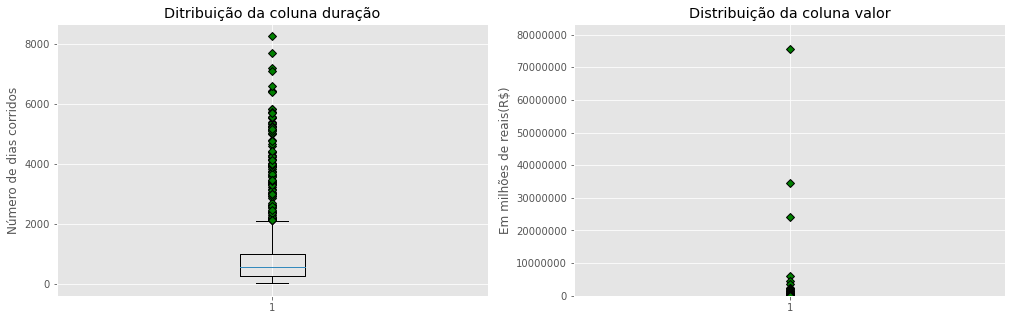

In [50]:
#alterando o estilo de exibição dos gráficos
plt.style.use('ggplot')

#gerando figuras para manipulação
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))

#grafico de distribuicao da duração
ax1.set_title('Ditribuição da coluna duração')
ax1.set_ylabel('Número de dias corridos')
ax1.boxplot(df['duracao'], flierprops=dict(markerfacecolor='g', marker='D'))

#grafico de distribuição do valor
ax2.set_title('Distribuição da coluna valor')
ax2.set_ylabel('Em milhões de reais(R$)')
ax2.set_ylim(0, max(df['valor'])*1.10)
ax2.boxplot(df['valor'], flierprops=dict(markerfacecolor='g', marker='D'))
ax2.get_yaxis().get_major_formatter().set_scientific(False)

#plotando os graficos
plt.show()

<b>Verificando os gráficos acima pode-se perceber que a distribução dos valores das colunas duração e valor têm diversos outliers(valores discrepantes), ou seja, valores muito divergentes da média geral dos dados. Em uma base comum isso poderia indicar problemas nos dados, como uma coleta malsucedida por exemplo, mas no caso de processos jurídicos é comum ter um grande conjunto de dados que seguem a mesma regra de tempo de duração e alguns outros que levam bastante tempo em tramitação.</b><br>

<b>Da mesma forma a coluna valor apresenta a média dos seus dados como zero, por isso não é apresentada uma box com a média e os quartis como no gráfico da duração. Mais uma vez, em uma base de processos jurídicos é comum encontrar processos com valores exorbitantes.</b><br>

<b>Por fim, gráficos do tipo boxplot são bons para verificar a distribuição dos dados de uma base e detectar anomalias nos dados, da mesma forma podem ser usados gráficos do tipo scatter para visualizar a disperção dos dados combinando duas ou mais variáveis.</b> 

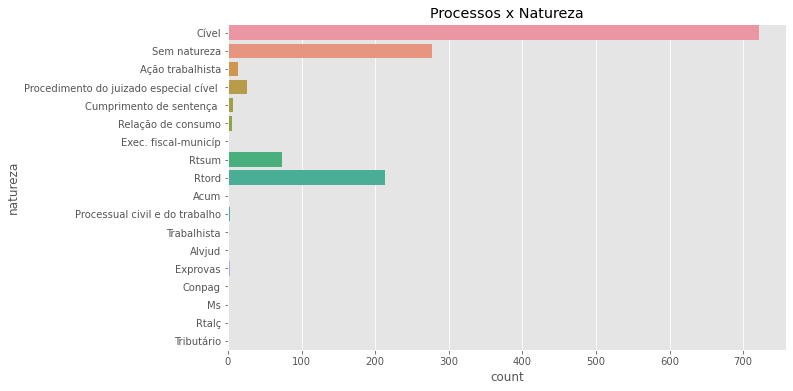

In [51]:
#gerando figuras para manipulação de largura e altura
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

#definindo um título
ax1.set_title('Processos x Natureza')

#plotando grafico do tipo barras com contagem de valores por categoria
sbn.countplot(y='natureza',data=df, orient='h')

<b>No gráfico acima é demonstrado o agrupamento de processos por natureza, pode-se perceber que a grande maioria dos processos é de natureza cível, seguidos por processos sem natureza e Rtord(Rito ordinário). Processos iniciados antes da implementação da justiça eletrônica costumam não ter natureza especificada pois a definição da natureza era feita manualmente. Gráficos de barras são bons para demonstrar diferenças entre valores, contagem de categorias e classificações.</b>

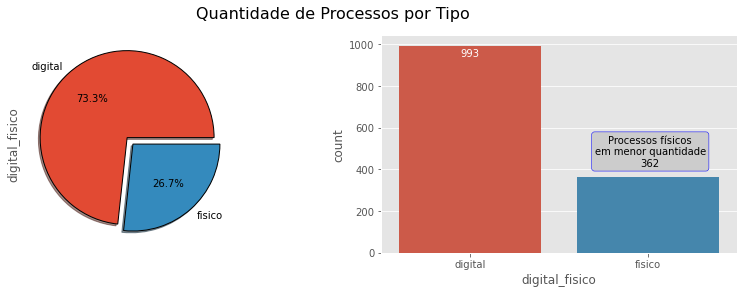

In [52]:
#gerando figuras para manipulação de largura e altura
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

#customização do grafico
fig1.suptitle('Quantidade de Processos por Tipo', fontsize=16)

dfcontagem = df.digital_fisico.value_counts(sort=True)

#plotando grafico do tipo pizza
dfcontagem.plot.pie(ax=ax1, autopct='%1.1f%%', shadow=True, explode=(0.1,0),
                                                   wedgeprops={"edgecolor":"0", 'linewidth': 1, 'antialiased': True})

#configurando quantidade numerica nas barras
ax2.annotate('{:.0f}'.format(dfcontagem['digital']), xy=(0, dfcontagem['digital']-50), xycoords='data', ha='center', color='w')

#exemplificando annotation em formato de caixa
ax2.annotate('Processos físicos\nem menor quantidade\n{:.0f}'.format(dfcontagem['fisico']), xy=(0, dfcontagem['fisico']-90), 
             xytext=(180, 30), textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8", color='b'), 
             xycoords='data', ha='center', color='black')


sbn.countplot(x='digital_fisico', data=df, orient='v', ax=ax2)

plt.show()

<b>Gráficos do tipo pizza são bons para demonstrar agrupamentos, classificações e divergências quando o conjunto de dados tem uma quantidade limitada de conjuntos. Nos gráficos acima pode-se verificar que os processos da base estão em maioria no formato digital, vamos verificar abaixo a combinação de duas variáveis em um gráfico do tipo scatter para analisar se há divergência entre a duração de um processo físico e um digital.</b>

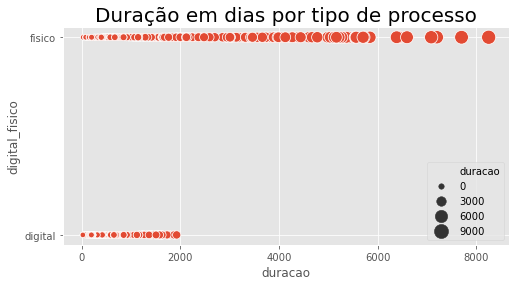

In [53]:
#filtrando os processos para garantir que sejam analisados apenas os que tem data de encerramento
df_filtro = df.query('encerramento!=""')

#gerando figuras para manipulação de largura e altura
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

#customizando gráfico
ax1.set_title('Duração em dias por tipo de processo', fontsize=20)

#plotando grafico de dispersão
sbn.scatterplot(y='digital_fisico', x='duracao', data=df_filtro, size='duracao', sizes=(30,200))

plt.legend()
plt.show()

<b>Pode-se perceber que os processos digitais, mesmo em maior número, tem duração bem menor de tramitação do que os processos físicos, isso pode indicar uma melhora na celeridade da justiça ao utilizar o formato digital.</b> 

<h3>Conclusão</h3><br>
O processo de análise de dados é de extrema importância para adiquirir informações importantes a partir de um conjunto de dados, estruturados ou não, com o auxílio da linguagem python torna-se prático realizar as etapas de limpeza, preparação e visualização dos dados. Independentemente do tamanho da base de dados utilizada pode-se, portanto, aplicar os conceitos e técnicas que a linguagem python disponibiliza para obter valor informacional.